In [1]:
print('셀 실행 shift + Enter')

셀 실행 shift + Enter


In [2]:
import sys
print(f'Python {sys.version}')

Python 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:29:04) [MSC v.1929 64 bit (AMD64)]


# 필수 라이브러리

In [3]:
import numpy as np
import tensorflow as tf
print(f'Tensorflow {tf.__version__}')


Tensorflow 2.15.0


In [4]:
x = list(range(10))

In [5]:
type(x)

list

In [6]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
len(x)

10

In [8]:
x * 2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
x + x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
[원소 * 2 for 원소 in x]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [11]:
x = np.array(range(10))

In [12]:
type(x)

numpy.ndarray

In [13]:
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [14]:
len(x)

10

In [15]:
x * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [16]:
x - x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
x2 = np.array([[0, 1, 2], [3, 4, 5]])

In [18]:
print(x2)

[[0 1 2]
 [3 4 5]]


In [19]:
x2 * 2

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [20]:
x2 - x2

array([[0, 0, 0],
       [0, 0, 0]])

In [21]:
len(x2)

2

In [22]:
x2.shape

(2, 3)

In [23]:
type(x2)

numpy.ndarray

In [24]:
x2.dtype

dtype('int32')

# 선형 회귀

In [25]:
import matplotlib.pyplot as plt

(100,) (100,)
[-5.        -4.8989899 -4.7979798] .. [4.7979798 4.8989899 5.       ]


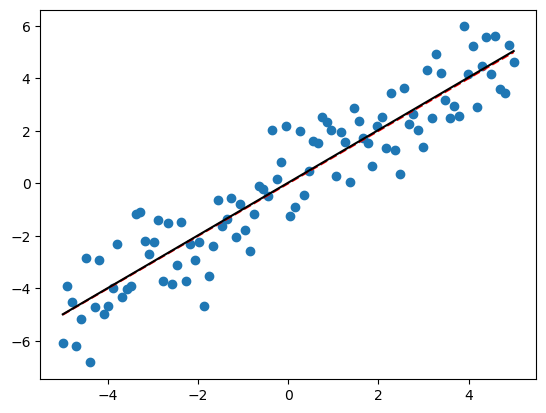

In [26]:
from sklearn.linear_model import LinearRegression

난수초기값 = 123
random = np.random.RandomState(난수초기값)
x = np.linspace(-5, 5, 100)
noise = random.randn(len(x))
y = x + noise

Xs = x.reshape(-1, 1)
model = LinearRegression()
model.fit(Xs, y)

print(x.shape, y.shape)
print(f'{x[:3]} .. {x[-3:]}')

plt.scatter(x, y)
plt.plot(x, y - noise, 'r--')
plt.plot(x, model.predict(Xs), c='black')
plt.show()

# 1943 MCP 뉴런

In [27]:
x = np.array([0.1, 0.2, 0.3])

In [28]:
w = np.random.randn(len(x))
w

array([ 1.09514783, -0.43457792,  0.44619236])

$ \sum_k^n{x_kw_k} = x_1w_1 + x_2w_2 + x_3w_3 = x w $ 

In [29]:
z = np.sum(x * w)
assert z == np.dot(x, w)

In [30]:
b = 0.1
y = 1 if z > b else -1

print(f'x={x} -> MCP(z={z:.3f}) -> y={y}')

x=[0.1 0.2 0.3] -> MCP(z=0.156) -> y=1


In [31]:
def MCP뉴런(x, w, b):
    z = np.dot(x, w) + b
    y = 1 if z > 0 else -1
    return y

In [32]:
y = MCP뉴런(x, w, b)
print(f'x={x} -> MCP(z={z:.3f}) -> y={y}')

x=[0.1 0.2 0.3] -> MCP(z=0.156) -> y=1


논리 회로

이 활동의 목적은 매개변수의 역할을 이해하는 것입니다.

In [33]:
def logic(w, b):
    for x in np.array([(0, 0), (0, 1), (1, 0), (1, 1)]):
        y = MCP뉴런(x, w, b)
        print(f'x={x} -> MCP -> y={y if y > 0 else 0}')

In [34]:
logic(w=np.array([0.5, 0.5]), b=-0.7)

x=[0 0] -> MCP -> y=0
x=[0 1] -> MCP -> y=0
x=[1 0] -> MCP -> y=0
x=[1 1] -> MCP -> y=1


In [35]:
logic(w=np.array([-0.5, -0.5]), b=0.7)

x=[0 0] -> MCP -> y=1
x=[0 1] -> MCP -> y=1
x=[1 0] -> MCP -> y=1
x=[1 1] -> MCP -> y=0


In [36]:
logic(w=np.array([0.5, 0.5]), b=-0.2)

x=[0 0] -> MCP -> y=0
x=[0 1] -> MCP -> y=1
x=[1 0] -> MCP -> y=1
x=[1 1] -> MCP -> y=1


# 1958 퍼셉트론

In [37]:
class 퍼셉트론:
    def __init__(self):
        self.w = None
        self.b = None

    def __call__(self, x):
        z = np.dot(x, self.w) + self.b
        y = np.where(z > 0, 1, -1)
        return y

    def 학습(self, Xs, ys, 학습횟수, 학습률=1.0):
        assert len(Xs) == len(ys)
        # 매개변수 초기화
        s, n = Xs.shape
        self.w = np.zeros(n, dtype='float32')
        self.b = 0.0

        for 에폭 in range(학습횟수):
            print(f'[학습 {에폭}] w={self.w}, b={self.b}')
            for xi, yi in zip(Xs, ys):
                output = self(xi)
                error = yi - output
                갱신 = error * 학습률
                self.w += 갱신 * xi
                self.b += 갱신

In [38]:
np.where([True, False, True, False], 1, -1)

array([ 1, -1,  1, -1])

In [39]:
np.where([[True, False], [False, True]], 1, -1)

array([[ 1, -1],
       [-1,  1]])

In [40]:
Xs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y_and = np.array([-1, -1, -1, 1])
model = 퍼셉트론()
model.학습(Xs, y_and, 학습횟수=10, 학습률=0.1)
assert all(model(Xs) == y_and)

[학습 0] w=[0. 0.], b=0.0
[학습 1] w=[0.2 0.2], b=0.2
[학습 2] w=[0.2 0.2], b=-0.2
[학습 3] w=[0.4 0.2], b=-0.2
[학습 4] w=[0.4 0.2], b=-0.4000000000000001
[학습 5] w=[0.4 0.4], b=-0.4000000000000001
[학습 6] w=[0.4 0.2], b=-0.6000000000000001
[학습 7] w=[0.4 0.2], b=-0.6000000000000001
[학습 8] w=[0.4 0.2], b=-0.6000000000000001
[학습 9] w=[0.4 0.2], b=-0.6000000000000001


In [41]:
Xs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y_nand = np.array([1, 1, 1, -1])
model = 퍼셉트론()
model.학습(Xs, y_nand, 학습횟수=10, 학습률=0.1)
assert all(model(Xs) == y_nand)

[학습 0] w=[0. 0.], b=0.0
[학습 1] w=[-0.2 -0.2], b=0.0
[학습 2] w=[-0.4 -0.2], b=0.2
[학습 3] w=[-0.4 -0.2], b=0.4000000000000001
[학습 4] w=[-0.4 -0.4], b=0.4000000000000001
[학습 5] w=[-0.4 -0.2], b=0.6000000000000001
[학습 6] w=[-0.4 -0.2], b=0.6000000000000001
[학습 7] w=[-0.4 -0.2], b=0.6000000000000001
[학습 8] w=[-0.4 -0.2], b=0.6000000000000001
[학습 9] w=[-0.4 -0.2], b=0.6000000000000001


In [42]:
Xs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y_or = np.array([-1, 1, 1, 1])
model = 퍼셉트론()
model.학습(Xs, y_or, 학습횟수=10, 학습률=0.1)
assert all(model(Xs) == y_or)

[학습 0] w=[0. 0.], b=0.0
[학습 1] w=[0.  0.2], b=0.2
[학습 2] w=[0.2 0.2], b=0.2
[학습 3] w=[0.2 0.2], b=0.0
[학습 4] w=[0.2 0.2], b=0.0
[학습 5] w=[0.2 0.2], b=0.0
[학습 6] w=[0.2 0.2], b=0.0
[학습 7] w=[0.2 0.2], b=0.0
[학습 8] w=[0.2 0.2], b=0.0
[학습 9] w=[0.2 0.2], b=0.0


In [43]:
from sklearn.datasets import load_iris

iris = load_iris()

In [44]:
type(iris)

sklearn.utils._bunch.Bunch

In [45]:
Xs = iris.data
Xs.shape

(150, 4)

In [46]:
import pandas as pd

pd.DataFrame(iris.data, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
붓꽃분류기 = 퍼셉트론()

In [50]:
필터 = np.logical_or(iris.target == 0, iris.target == 1)
y1 = iris.target[필터]
X1 = iris.data[필터]
y1 = np.where(y1 == 1, 1, -1)
assert all(np.unique(y1) == [-1, 1])
assert len(y1) == len(X1)

붓꽃분류기.학습(X1, y1, 학습횟수=10, 학습률=0.1)

[학습 0] w=[0. 0. 0. 0.], b=0.0
[학습 1] w=[1.4  0.64 0.94 0.28], b=0.2
[학습 2] w=[ 0.79999995 -0.02000003  1.32        0.48      ], b=0.0
[학습 3] w=[-0.22000004 -0.72        1.0400001   0.44      ], b=-0.2
[학습 4] w=[-0.22000004 -0.72        1.0400001   0.44      ], b=-0.2
[학습 5] w=[-0.22000004 -0.72        1.0400001   0.44      ], b=-0.2
[학습 6] w=[-0.22000004 -0.72        1.0400001   0.44      ], b=-0.2
[학습 7] w=[-0.22000004 -0.72        1.0400001   0.44      ], b=-0.2
[학습 8] w=[-0.22000004 -0.72        1.0400001   0.44      ], b=-0.2
[학습 9] w=[-0.22000004 -0.72        1.0400001   0.44      ], b=-0.2


In [51]:
예측 = 붓꽃분류기(X1)
print(f'{sum(예측 == y1)} / {len(y1)}')

100 / 100


In [52]:
필터 = np.logical_or(iris.target == 1, iris.target == 2)
y2 = iris.target[필터]
X2 = iris.data[필터]
y2 = np.where(y2 == 1, 1, -1)
assert all(np.unique(y2) == [-1, 1])
assert len(y2) == len(X2)

붓꽃분류기.학습(X2, y2, 학습횟수=20, 학습률=1.0)

[학습 0] w=[0. 0. 0. 0.], b=0.0
[학습 1] w=[ 1.4       -0.1999999 -2.6000004 -2.2      ], b=0.0
[학습 2] w=[ 2.7999997 -0.3999997 -5.2000003 -4.4      ], b=0.0
[학습 3] w=[ 4.1999993  -0.59999955 -7.8        -6.6000004 ], b=0.0
[학습 4] w=[  5.599999    -0.79999936 -10.400001    -8.8       ], b=0.0
[학습 5] w=[  6.9999986   -0.99999917 -13.000001   -11.        ], b=0.0
[학습 6] w=[  8.399998  -1.199999 -15.6      -13.2     ], b=0.0
[학습 7] w=[  9.799997   -1.3999988 -18.2       -15.4      ], b=0.0
[학습 8] w=[ 11.199997   -1.5999986 -20.800001  -17.599998 ], b=0.0
[학습 9] w=[ 12.599997   -1.7999984 -23.400002  -19.8      ], b=0.0
[학습 10] w=[ 13.999996   -1.9999982 -26.000002  -22.       ], b=0.0
[학습 11] w=[ 15.399996  -2.199998 -28.600002 -24.2     ], b=0.0
[학습 12] w=[ 16.799995   -2.3999977 -31.200003  -26.400002 ], b=0.0
[학습 13] w=[ 18.199995   -2.5999975 -33.800003  -28.600002 ], b=0.0
[학습 14] w=[ 19.599997   -2.7999973 -36.4       -30.800003 ], b=0.0
[학습 15] w=[ 21.999998   -1.7999972 -37.2       -3

In [53]:
예측 = 붓꽃분류기(X2)
print(f'{sum(예측 == y2)} / {len(y2)}')

50 / 100


[학습 0] w=[0. 0.], b=0.0
[학습 1] w=[1.4  0.94], b=0.2
[학습 2] w=[0.79999995 1.32      ], b=0.0
[학습 3] w=[0.19999996 1.7000002 ], b=-0.2
[학습 4] w=[0.31999993 2.1200001 ], b=-0.2
[학습 5] w=[-0.70000005  1.8400002 ], b=-0.4
[학습 6] w=[-0.70000005  1.8400002 ], b=-0.4
[학습 7] w=[-0.70000005  1.8400002 ], b=-0.4
[학습 8] w=[-0.70000005  1.8400002 ], b=-0.4
[학습 9] w=[-0.70000005  1.8400002 ], b=-0.4
[학습 0] w=[0. 0.], b=0.0
[학습 1] w=[ 0.13999997 -0.26      ], b=0.0
[학습 2] w=[ 0.27999997 -0.52      ], b=0.0
[학습 3] w=[ 0.41999996 -0.78      ], b=0.0
[학습 4] w=[ 0.55999994 -1.04      ], b=0.0
[학습 5] w=[ 0.6999999 -1.3      ], b=0.0
[학습 6] w=[ 0.8399999 -1.56     ], b=0.0
[학습 7] w=[ 0.98      -1.8199999], b=0.0
[학습 8] w=[ 1.1200001 -2.08     ], b=0.0
[학습 9] w=[ 1.2600002 -2.34     ], b=0.0


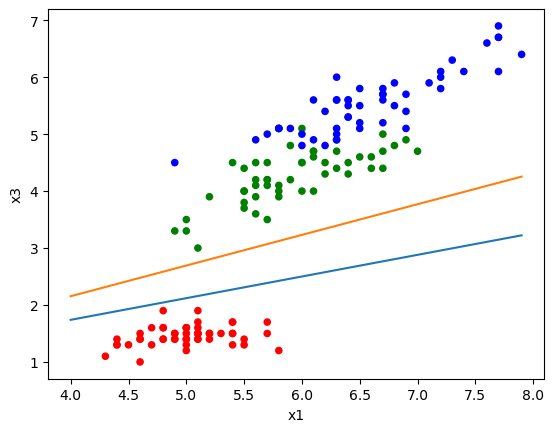

In [54]:
iris.frame = pd.DataFrame(iris.data, columns=[f'x{i}' for i in range(1, 5)])

유형별색상 = np.where(
    iris.target == 0, 'r', np.where(iris.target == 1, 'g', 'b'))
iris.frame.plot(kind='scatter', x='x1', y='x3', c=유형별색상)

model_1 = 퍼셉트론()
model_1.학습(X1[:, [0, 2]], y1, 학습횟수=10, 학습률=0.1)

model_2 = 퍼셉트론()
model_2.학습(X2[:, [0, 2]], y2, 학습횟수=10, 학습률=0.1)

# 결정 경계 시각화
z0 = lambda x1, w, b: (w[0] * x1 + b) / -w[1]
x1 = np.arange(4.0, 8.0, 0.1)
plt.plot(x1, z0(x1, w=model_1.w, b=model_1.b))
plt.plot(x1, z0(x1, w=model_2.w, b=model_2.b))
plt.show()

Perceptron -> Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

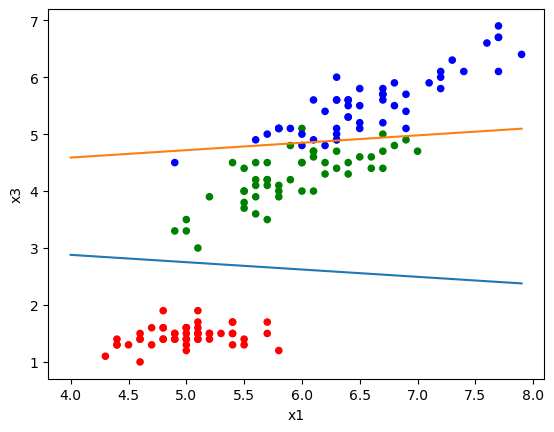

In [56]:
iris.frame = pd.DataFrame(iris.data, columns=[f'x{i}' for i in range(1, 5)])

유형별색상 = np.where(
    iris.target == 0, 'r', np.where(iris.target == 1, 'g', 'b'))
iris.frame.plot(kind='scatter', x='x1', y='x3', c=유형별색상)

model_1 = LogisticRegression()
model_1.fit(X1[:, [0, 2]], y1)

model_2 = LogisticRegression()
model_2.fit(X2[:, [0, 2]], y2)

# 결정 경계 시각화
z0 = lambda x1, w, b: (w[0] * x1 + b) / -w[1]
x1 = np.arange(4.0, 8.0, 0.1)
plt.plot(x1, z0(x1, w=model_1.coef_[0], b=model_1.intercept_))
plt.plot(x1, z0(x1, w=model_2.coef_[0], b=model_2.intercept_))
plt.show()